In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [3]:
df= pd.read_csv('/Users/admin/code/ahmedhassan230/project_h4y/raw_data/osteoporosis.csv')

In [4]:
df

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,1991635,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,None,Yes,0
1954,1528601,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,None,None,Corticosteroids,No,0
1955,1990957,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,None,Hyperthyroidism,None,No,0
1956,1779848,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [10]:
un=df['Alcohol Consumption'].unique()
un

array(['Moderate', 'None'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
list_col=['Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption']
labelencoder = LabelEncoder()
for col in list_col:
    df[col]=labelencoder.fit_transform(df[col])

In [21]:
X=df[['Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption']]
y=df['Osteoporosis']

In [24]:
X, y

(      Body Weight  Calcium Intake  Vitamin D Intake  Physical Activity  \
 0               1               1                 1                  1   
 1               1               1                 1                  1   
 2               0               0                 1                  0   
 3               1               0                 0                  1   
 4               0               1                 1                  0   
 ...           ...             ...               ...                ...   
 1953            0               0                 1                  1   
 1954            1               1                 0                  0   
 1955            1               1                 1                  1   
 1956            0               1                 0                  1   
 1957            1               0                 1                  1   
 
       Smoking  Alcohol Consumption  
 0           1                    0  
 1           0        

In [27]:
df=pd.concat([X,y], axis=1, ignore_index= True)
df

,0,1,2,3,4,5,6
0,1,1,1,1,1,0,1
1,1,1,1,1,0,1,1
2,0,0,1,0,0,0,1
3,1,0,0,1,1,1,1
4,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...
1953,0,0,1,1,1,0,0
1954,1,1,0,0,0,1,0
1955,1,1,1,1,0,1,0
1956,0,1,0,1,1,1,0


<Axes: >

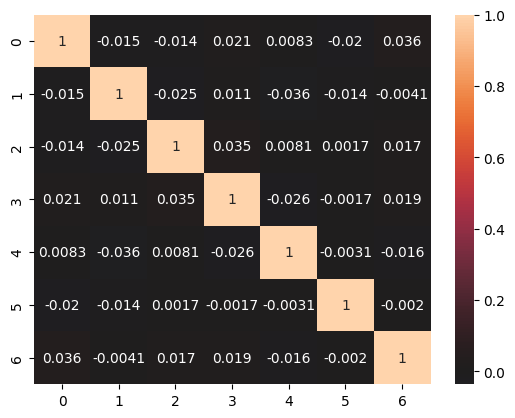

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
#plt.figure
sns.heatmap(corr_matrix, annot= True, center=0)

In [36]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [46]:
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred=model.predict(X_test)

In [51]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.5178571428571429